### 이미지 데이터 불러오기

In [1]:
import os
folder_path = 'image/'
files = os.listdir(folder_path)
files

['image1',
 'image10',
 'image100',
 'image101',
 'image102',
 'image103',
 'image104',
 'image105',
 'image106',
 'image107',
 'image108',
 'image109',
 'image11',
 'image110',
 'image111',
 'image112',
 'image113',
 'image114',
 'image115',
 'image116',
 'image117',
 'image118',
 'image119',
 'image12',
 'image120',
 'image121',
 'image122',
 'image123',
 'image124',
 'image125',
 'image126',
 'image127',
 'image128',
 'image129',
 'image13',
 'image130',
 'image131',
 'image132',
 'image133',
 'image134',
 'image135',
 'image136',
 'image137',
 'image138',
 'image139',
 'image14',
 'image140',
 'image141',
 'image142',
 'image143',
 'image144',
 'image145',
 'image146',
 'image147',
 'image148',
 'image149',
 'image15',
 'image150',
 'image151',
 'image152',
 'image153',
 'image154',
 'image155',
 'image156',
 'image157',
 'image158',
 'image159',
 'image16',
 'image160',
 'image161',
 'image162',
 'image163',
 'image164',
 'image165',
 'image166',
 'image167',
 'image168',
 'image1

In [2]:
# Rename each file using the base name and a unique identifier
try:
    for i, old_name in enumerate(files):
        new_name = f"image{i + 1}"
        old_file_path = os.path.join(folder_path, old_name)
        new_file_path = os.path.join(folder_path, new_name)
    
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"File '{old_name}' successfully renamed to '{new_name}'.")
except Exception:
    print('이미 있습니다')

File 'image1' successfully renamed to 'image1'.
이미 있습니다


### 이미지 데이터 넘파이 변환

In [3]:
from PIL import Image
import numpy as np

In [4]:
image = Image.open('./image/image1')
image = image.resize((48,48))    # 48*48 사이즈 변환
img_array = np.array(image)
img_array

array([[[174,  90, 101],
        [171,  89, 100],
        [171,  82,  95],
        ...,
        [173,  83,  94],
        [169,  83,  95],
        [169,  85,  96]],

       [[172,  92, 105],
        [170,  92, 103],
        [170,  87,  98],
        ...,
        [173,  86,  98],
        [169,  84,  97],
        [169,  86,  98]],

       [[171,  97, 108],
        [169,  93, 104],
        [169,  92, 102],
        ...,
        [171,  91, 101],
        [169,  89, 101],
        [169,  91, 103]],

       ...,

       [[171,  87,  99],
        [170,  87, 100],
        [171,  80,  92],
        ...,
        [169,  73,  88],
        [169,  82,  96],
        [170,  81,  94]],

       [[174,  99, 109],
        [172,  95, 105],
        [171,  90, 101],
        ...,
        [176,  93, 105],
        [171,  90, 101],
        [171,  94, 103]],

       [[170,  92, 106],
        [169,  90, 103],
        [169,  85,  97],
        ...,
        [173,  85,  98],
        [168,  86,  97],
        [168,  87,  99]]

In [5]:
from glob import glob
imgList = glob('image/' + '*')
numpyList = []
for i in imgList:
    image = Image.open(i)
    image = image.resize((48,48))
    img_array = np.array(image)
    numpyList.append(img_array)

### VGG16 전이학습

In [6]:
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.applications import VGG19

In [7]:
transfer_model = VGG19(weights='imagenet', include_top=False)
transfer_model.trainable=False
transfer_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [8]:
# Define your custom Model
myModel = Sequential()
myModel.add(transfer_model)
myModel.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='block_conv'))
myModel.add(layers.Dense(64, activation='relu', name='block1_conv1'))
myModel.add(layers.Dense(128, activation='relu', name='block2_conv1'))
myModel.add(layers.Dense(256, activation='relu', name='block3_conv1'))
myModel.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='block4_conv2'))
myModel.add(layers.Dropout(0.5))
myModel.add(layers.Dense(512, activation='relu', name='block4_conv1'))
myModel.add(layers.Dropout(0.5))
myModel.add(layers.Dense(512, activation='relu', name='block5_conv1'))

myModel.add(layers.Dense(3, activation='softmax'))
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 block_conv (Conv2D)         (None, None, None, 512)   2359808   
                                                                 
 block1_conv1 (Dense)        (None, None, None, 64)    32832     
                                                                 
 block2_conv1 (Dense)        (None, None, None, 128)   8320      
                                                                 
 block3_conv1 (Dense)        (None, None, None, 256)   33024     
                                                                 
 block4_conv2 (Conv2D)       (None, None, None, 512)   1180160   
                                                                 
 dropout (Dropout)           (None, None, None, 512)   0

(None, None, None, 512) 
- 샘플, 높이, 너비, 필터

kernel_size=(3, 3)
- 필터 크기

strides=(2, 2)
- 필터 이동 크기

활성화 함수 Relu: 비선형성 함수, f(x)=최대(0,x)로 기울기 소실문제 해결

Input Feature Map (4x4):
```
| 1 | 2 | 3 | 4 |
| 5 | 6 | 7 | 8 |
| 9 |10 |11 |12 |
|13 |14 |15 |16 |
```

Output Feature Map (2x2)
```
| 6 | 8 |
|14 |16 |
```
2*2 행열 반복 하는 중 가장 큰값 하나만 가져옴 6,8,14,16


Upsampling2D는 입력 데이터의 공간 차원을 업샘플링하거나 늘리는 데 사용되는 레이어입니다. CNN(컨벌루션 신경망) 및 기타 딥 러닝 아키텍처, 특히 이미지 분할이나 고해상도 이미지 생성과 같은 작업에 자주 사용됩니다.

입력: 특정 공간 해상도(높이, 너비)

업샘플링: 각 차원(높이, 너비)에 대해 값이 반복되거나 중복되어 데이터 크기가 커집니다.간 해상도가 높아졌습니다.

In [9]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [10]:
[myModel.get_layer(name).output for name in style_layers]

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [11]:
import tensorflow as tf

In [12]:
def build_vgg_layers(layer_names):
    '''return output activation value'''
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    network = tf.keras.Model(inputs=[vgg.input], outputs=outputs)

    return network

In [13]:
# extract image style
style_extractor = build_vgg_layers(style_layers)
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [14]:
# 정규화된 이미지 
contentImage=np.expand_dims(numpyList[3]/255, axis=0)
styleImage=np.expand_dims(numpyList[5]/255, axis=0)
contentImage.shape

(1, 48, 48, 3)

In [15]:
# 5 values with ReLU activation are applied
style_outputs = style_extractor(styleImage)

style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape

(TensorShape([1, 48, 48, 64]),
 TensorShape([1, 24, 24, 128]),
 TensorShape([1, 12, 12, 256]),
 TensorShape([1, 6, 6, 512]),
 TensorShape([1, 3, 3, 512]))

In [16]:
# https://www.tensorflow.org/api_docs/python/tf/einsum
# Loss between the style and the content image (see original paper, section 2.2)
def gram_matrix(layer_activation):
    result = tf.linalg.einsum('bijc,bijd->bcd', layer_activation, layer_activation)
    input_shape = tf.shape(layer_activation)
    num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)

    return result / num_locations  # Normalizing

In [17]:
class StyleContentModel(tf.keras.models.Model):
    '''Build a model that returns the style and content tensors.'''
    def __init__(self, style_layers, content_layers):
        super().__init__() 
        self.vgg = build_vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False  

    def call(self, inputs):
        inputs = inputs * 255.0  # 정규화
        # Data is preprocessed and passed to the VGG (normalized from -127.50 to +127.50)
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs = outputs[:self.num_style_layers]
        content_outputs = outputs[self.num_style_layers:]

        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

In [18]:
extractor = StyleContentModel(style_layers, content_layers)
results = extractor(contentImage)

In [19]:
for key, value in results.items():
    print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [20]:
style_targets = extractor(styleImage)['style']
content_targets = extractor(contentImage)['content']

In [21]:
import matplotlib.pyplot as plt

Epoch 50 | content loss: 0.0 | style loss: 948189659136.0 | total loss 948189659136.0


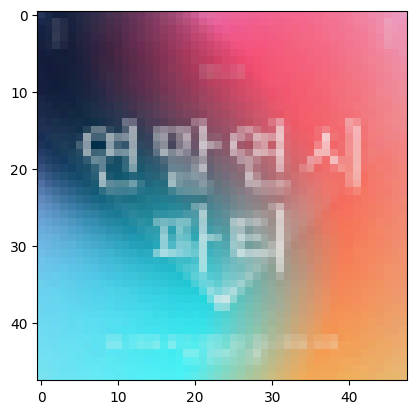

Epoch 100 | content loss: 0.0 | style loss: 948189659136.0 | total loss 948189659136.0


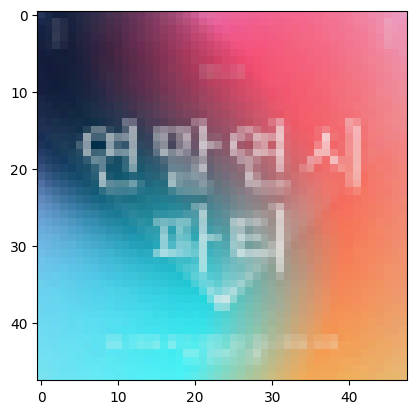

Epoch 150 | content loss: 0.0 | style loss: 948189659136.0 | total loss 948189659136.0


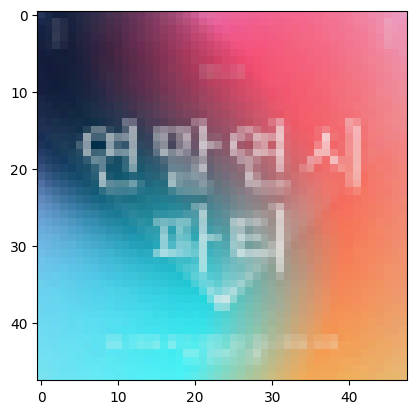

Epoch 200 | content loss: 0.0 | style loss: 948189659136.0 | total loss 948189659136.0


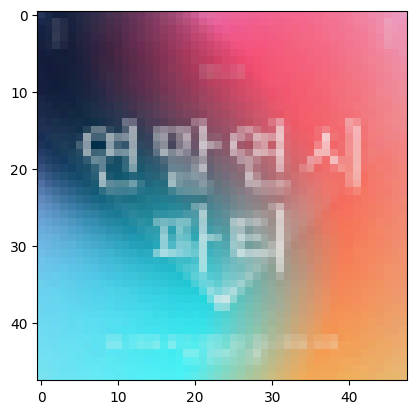

In [22]:
new_image = tf.Variable(contentImage)
optimizer = tf.optimizers.Adam(learning_rate=0.067)

content_weight = 1  # The greater the content weight, the greater the retention of the original image content
style_weight = 1000  # The greater the style weight, the more styles are preserved

num_epochs = 200
verbose = 50

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        outputs = extractor(new_image)

        content_outputs = outputs['content']
        style_outputs = outputs['style']

        content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])

        style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

        total_loss = content_loss + style_loss

    gradient = tape.gradient(total_loss, new_image)
    # optimizer.apply_gradients([(gradient, new_image)])

    # new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

    if (epoch + 1) % verbose == 0:
        print(f'Epoch {epoch + 1} | content loss: {content_loss} | style loss: {style_loss} | total loss {total_loss}')
        plt.imshow(tf.squeeze(new_image, axis=0))
        plt.show()

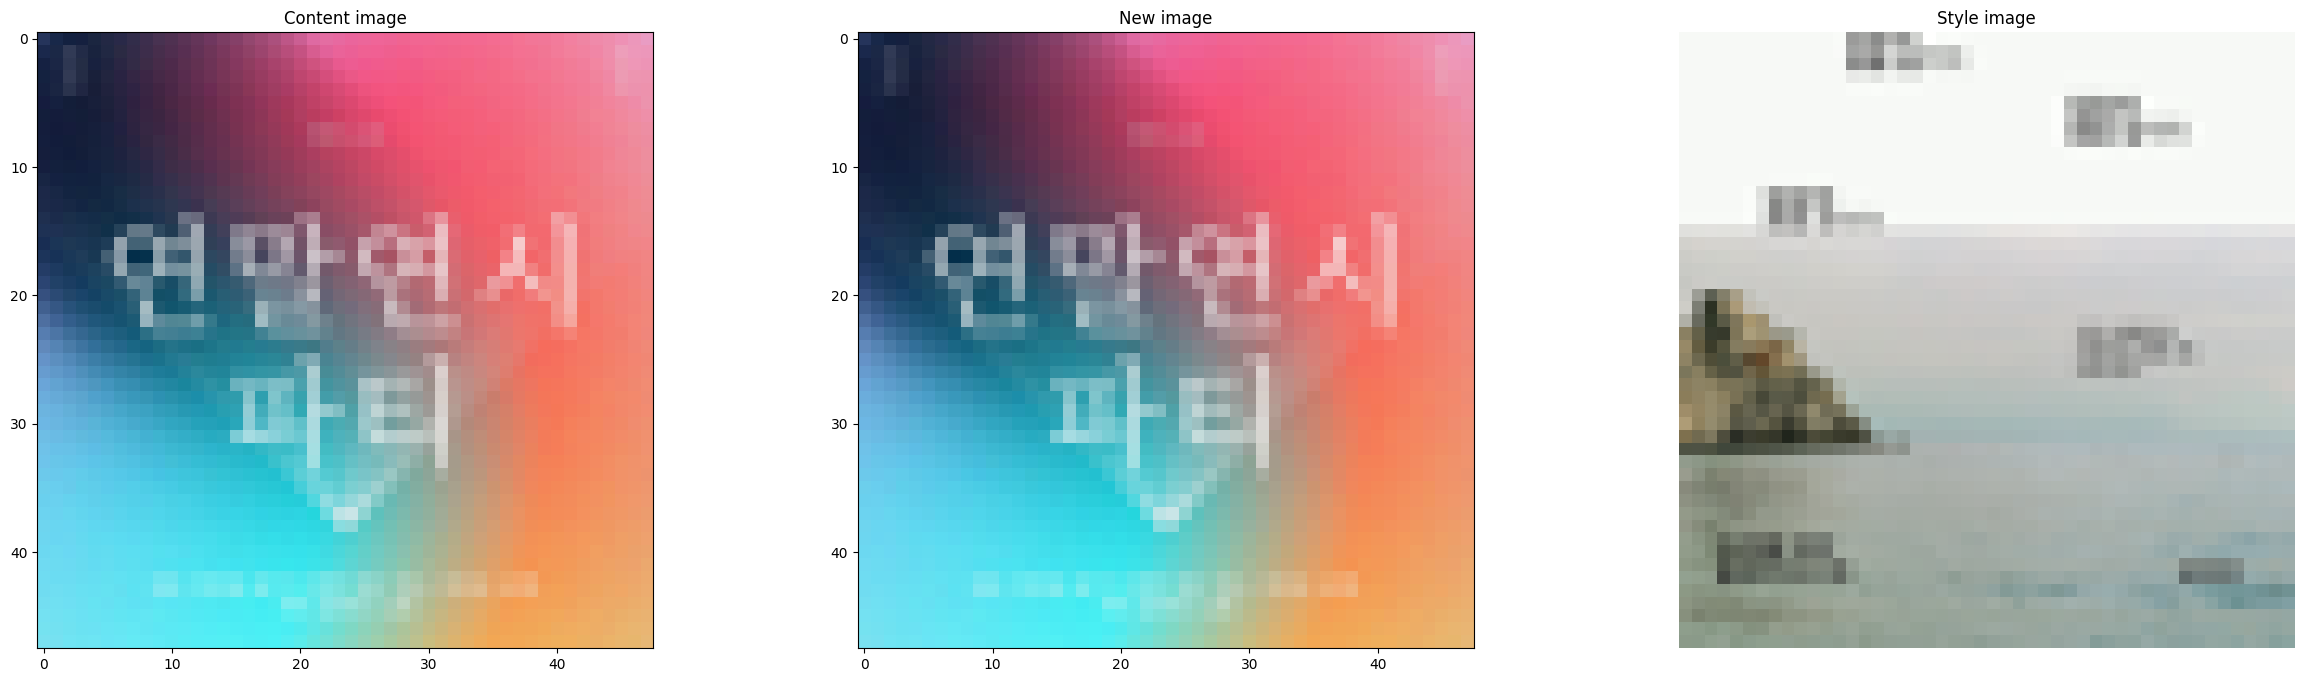

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
ax1.imshow(tf.squeeze(contentImage, axis=0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis=0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(styleImage, axis=0))
ax3.set_title('Style image')
plt.axis('off');